In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import linalg as lin

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-whitegrid']) #,'data/cours.mplstyle'])

In [3]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

# Matrice de passage

On a vu qu'une matrice représente une application linéaire qui déplace les points qu'on lui donne.

On va voir qu'une matrice sert aussi à représenter un changement de repère à savoir quelle est la valeur
d'un point par rapport à un autre repère.

In [4]:
def arrow2D(a,b, color='k', **kargs):
    astyle = matplotlib.patches.ArrowStyle("simple", head_length=.8, head_width=.8, tail_width=.1)
    plt.plot([a[0],b[0]], [a[1],b[1]] ,visible = False) # to define the visible windows
    plt.annotate("", xytext=a, xy=b, 
                 arrowprops=dict(arrowstyle=astyle, shrinkA=0, shrinkB=0, aa=True, color=color, **kargs))

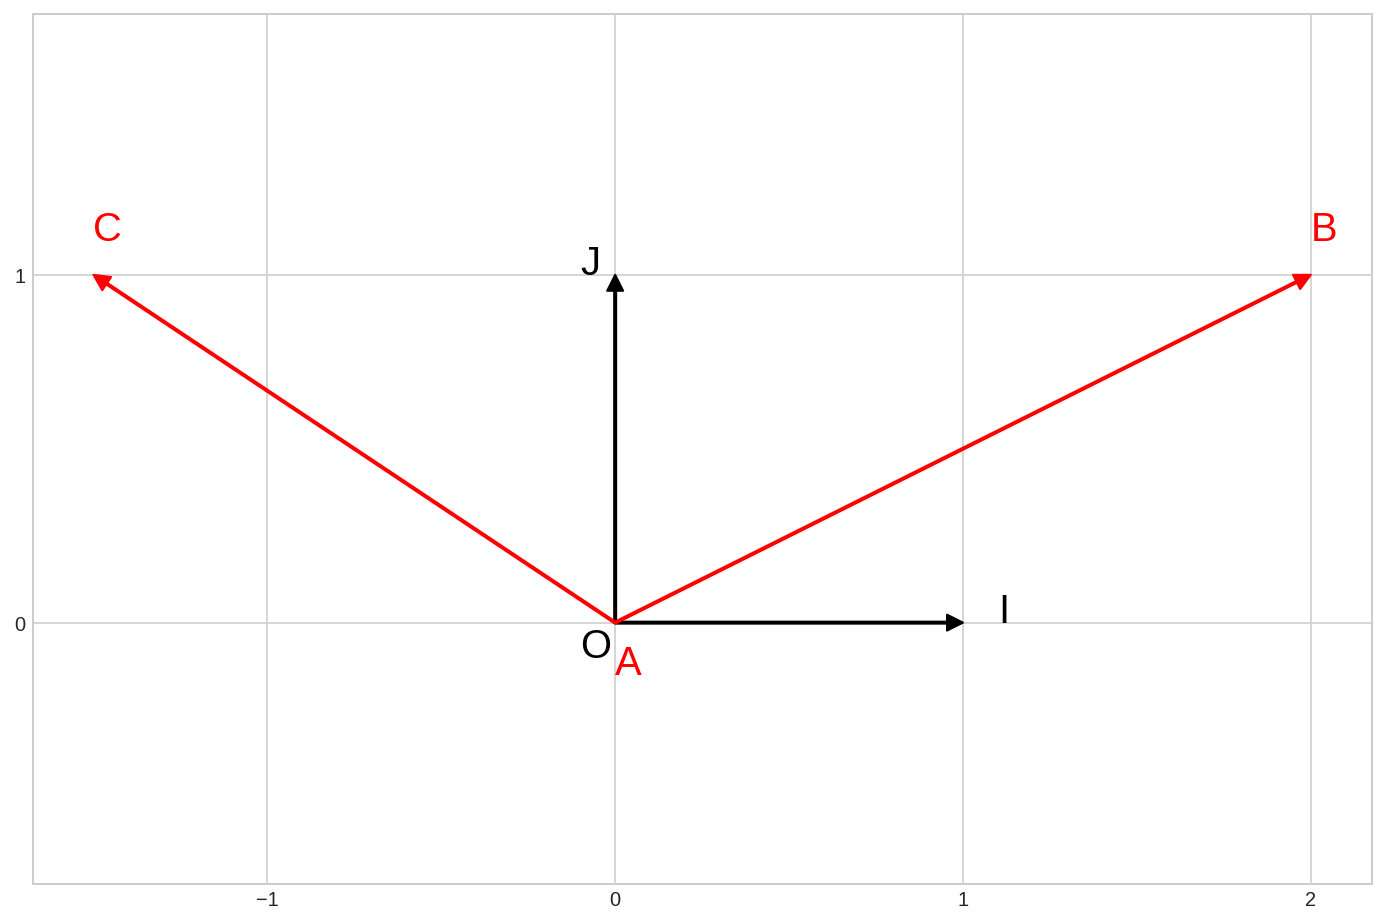

In [5]:
# beaucoup de code pour un petit dessin

δx = np.array((0.1, 0))
δy = np.array((0, 0.1))

O = np.array((0,0))
I = np.array((1,0))
J = np.array((0,1))
plt.annotate("O", O - δx -δy , size=20, color='k')
plt.annotate("I", I + δx, size=20, color='k')
plt.annotate("J", J - δx, size=20, color='k')

A = np.array((0,0))
B = np.array((2,1))
C = np.array((-1.5,1))
plt.annotate("A", A - 1.5* δy, size=20, color='r')
plt.annotate("B", B + δy, size=20, color='r')
plt.annotate("C", C + δy , size=20, color='r')

arrow2D(O,I)
arrow2D(O,J)
arrow2D(A,B, 'r')
arrow2D(A,C, 'r')

plt.xticks(np.arange(-3,3,1))
plt.yticks(np.arange(0,2,1))
plt.axis("equal");

La matrice de passage d'un repère à un autre l'ensemble des vecteurs de la seconde base exprimés dans la première base.



In [6]:
P = np.array([(B-A), (C-A)]).T  # matrice de passage : déformation sans la translation
P

array([[ 2. , -1.5],
       [ 1. ,  1. ]])

### Vecteurs dans le nouveau repère

Cette déformation permet de passer d'une représentation de l'espace à une autre (d'un repère à un autre). 

Regardons ce que valent certains vecteur dans chacune des bases :

| | base départ (O,I,J) | base d'arrivée (A,B,C) |
| --:| :-: | :-: |
AB | [2,1] | [1,0] |
AC | [-1.5, 1] | [0,1] |
OI | [1,0] | ? |

In [7]:
P @ [0,1] # donne AC, [0,1] de base d'arrivée, exprimé dans la base de départ

array([-1.5,  1. ])

C'est logique puisqu'il s'agit de la 2e colonne de la matrice de passage. On a donc

$$ \mathbf{v}_{(d)} = P \; \mathbf{v}_{(a)} $$

avec :

* $ \mathbf{v}_{(d)}$ : le vecteur __v__ exprimé dans la base de départ
* $ \mathbf{v}_{(a)}$ : le vecteur __v__ exprimé dans la base d'arrivée

et on a aussi 

$$ \mathbf{v}_{(a)} = P^{-1} \; \mathbf{v}_{(d)} $$

Cela nous permet de calculer la case qui nous manque à savoir OI exprimé dans la base d'arrivée :

In [8]:
xa = lin.inv(P) @ [1,0]
xa

array([ 0.286, -0.286])

c.a.d. OI = 0.286 AB - 0.286 AC.

### Matrice de passage vue comme une transformation

En tant que matrice, une matrice de passage représente aussi une application linéaire. Elle prend un vecteur et le déforme.

Ainsi le vecteur OI est déformé par P pour devenir AB. On peut donc écrire :

$$ AB = P\; OI $$

Dans ce cas, tout est exprimé en fonction du repère de départ. On a 

$$ \mathbf{w}_{(d)} = P \; \mathbf{v}_{(d)} $$


### Points dans le nouveau repère

Lorsqu'on pense en point, alors l'orgine des deux repères peut être différente.



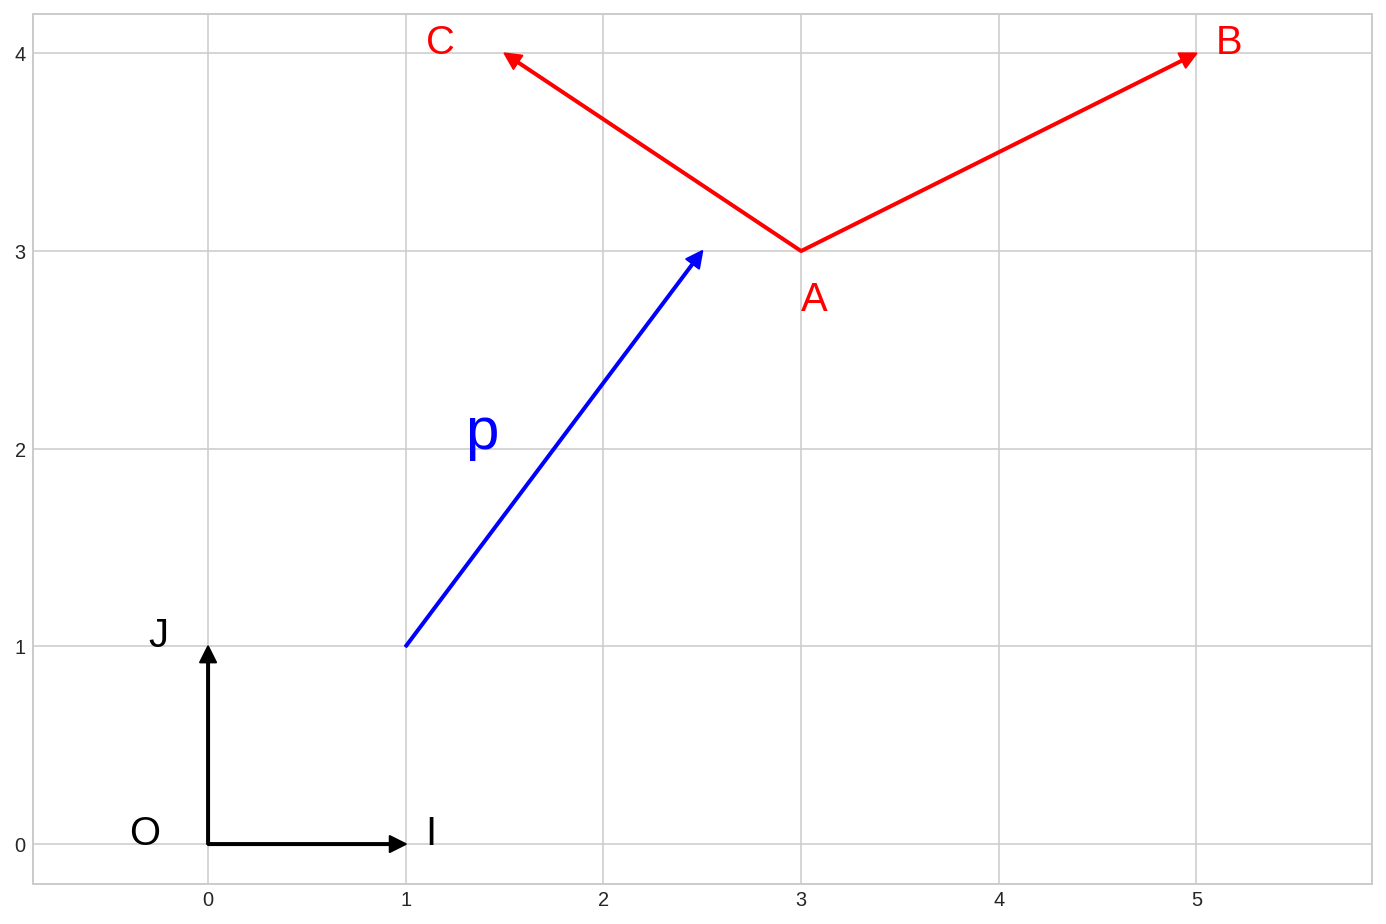

In [9]:
plt.annotate("O", O - 4*δx, size=20, color='k')
plt.annotate("I", I + δx, size=20, color='k')
plt.annotate("J", J - 3*δx, size=20, color='k')

A = np.array((3,3))
B = np.array((5,4))
C = np.array((1.5,4))
plt.annotate("A", A - 3*δy, size=20, color='r')
plt.annotate("B", B + δx, size=20, color='r')
plt.annotate("C", C - 4*δx , size=20, color='r')

arrow2D(O,I)
arrow2D(O,J)
arrow2D(A,B, 'r')
arrow2D(A,C, 'r')

arrow2D([1,1], [2.5,3], 'b')
plt.annotate("p", (1.3,2), size=30, color='b')
plt.yticks(np.arange(0,5,1))
plt.axis("equal");

Si on veut travailler sur les points il faut prendre en compte la translation d'un repère vers l'autre soit de O vers A.

La bonne facon de faire en mathématique est de séparer la déformation de la translation ce qui permet de rester
dans l'espace 2D.


In [10]:
P2D = P
A + P2D @ I  #  passage de I en B

array([5., 4.])

Mais on a vu qu'on peut intègrer la translation dans une matrice d'une dimension supérieure.

In [11]:
P = np.identity(3) # defines the size and set the last line (others will be overwritten)
P[:2, :2] = P2D    # deformation
P[:2, 2] = A       # translation
P

array([[ 2. , -1.5,  3. ],
       [ 1. ,  1. ,  3. ],
       [ 0. ,  0. ,  1. ]])

In [12]:
def to3D(x):
    """ Transform 2D point(s) to 3D point(s) with 1 as third value """
    if type(x) == list:
        x = np.array(x)
    if len(x.shape) == 1:
        return np.array([*x,1])
    elif len(x.shape) == 2:
        return np.array([*x,np.ones(len(x[0]))])
    else:
        raise Exception('Erreur de dimension')

Notre matrice de passage P qui inclu la translation de l'origine permet de calculer la position d'un point
dans le nouveau repère.

In [13]:
P @ to3D([0,1])  # C expressed in start basis including translation

array([1.5, 4. , 1. ])

### Notre souris dans le nouveau repère

A quoi ressemble la souris exprimée dans le repère d'arrivée vue depuis le repère de départ.

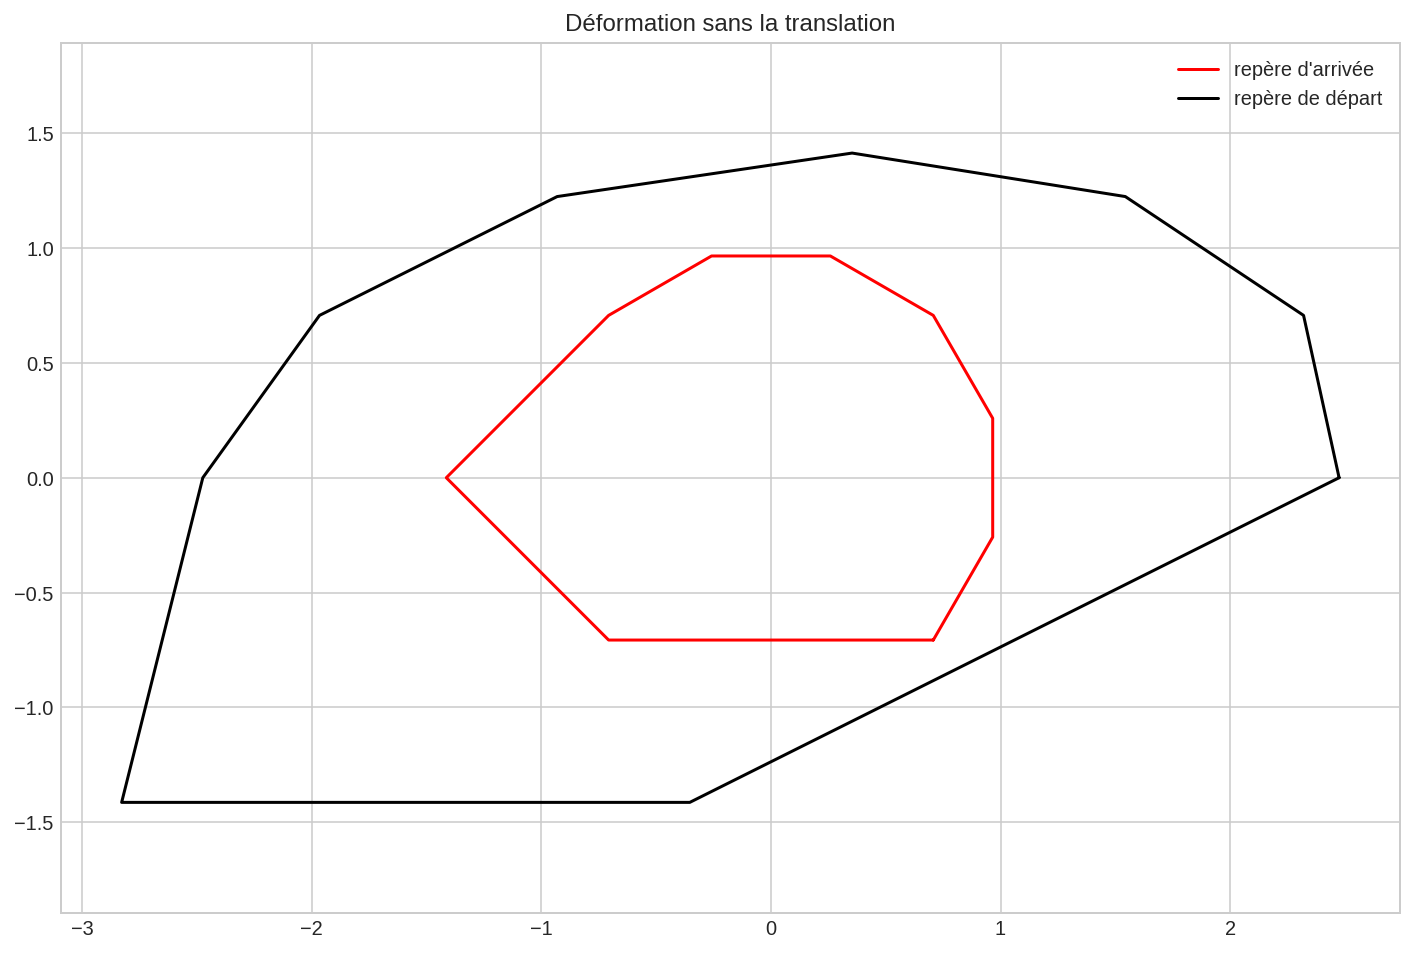

In [14]:
mouse = np.load('data/mouse.npy')

dmouse = P2D @ mouse

plt.plot(mouse[0,:], mouse[1,:], color='r', label="repère d'arrivée")
plt.plot(dmouse[0,:], dmouse[1,:], color='k', label='repère de départ')
plt.title('Déformation sans la translation')
plt.legend()
plt.axis("equal");

On peut aussi voir la souris noire comme la transformée de la souris rouge par la matrice de passage.

Si on ajoute la translation, alors on a :

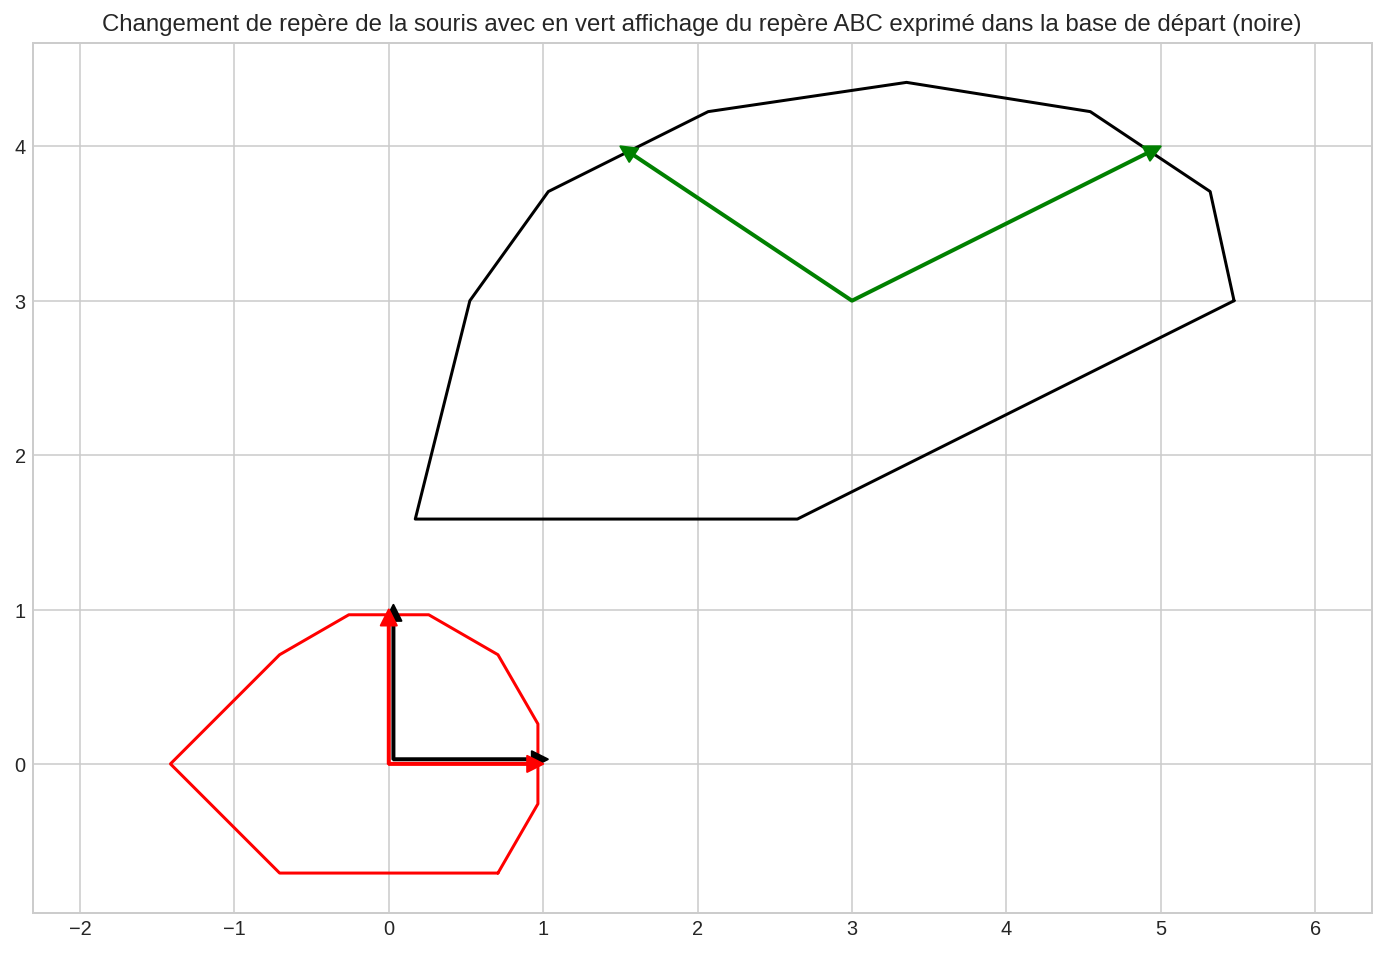

In [15]:
ε = 0.03  # pour voir les 2 repères qui sont supperposés

pmouse = P @ to3D(mouse)

arrow2D(O+ε,I+ε, 'k')
arrow2D(O+ε,J+ε, 'k')
arrow2D(O,I, 'r')
arrow2D(O,J, 'r')
arrow2D(A,B, 'g')
arrow2D(A,C, 'g')

plt.plot(mouse[0,:], mouse[1,:], 'red')
plt.plot(pmouse[0,:], pmouse[1,:], 'black')
plt.axis("equal")
plt.title('Changement de repère de la souris avec en vert affichage du repère ABC exprimé dans la base de départ (noire)');

### Exercice -- Et l'inverse ?

À quoi ressemble la souris du repère de départ vue depuis le repère d'arrivée ?

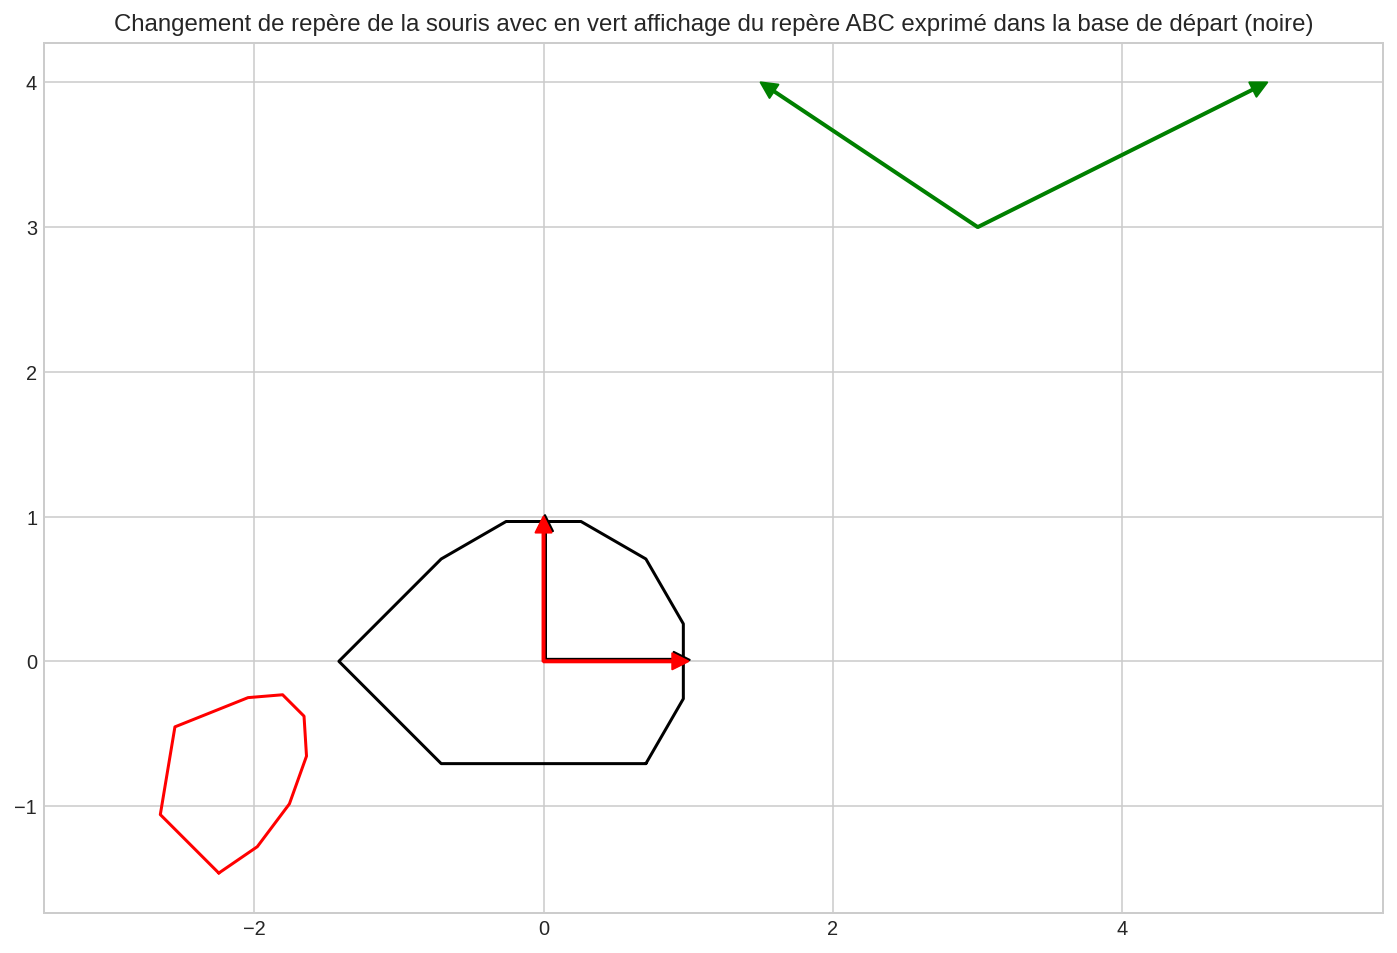

In [30]:

pmouse = lin.inv(P) @ to3D(mouse)

arrow2D(O+ε,I+ε, 'k')
arrow2D(O+ε,J+ε, 'k')
arrow2D(O,I, 'r')
arrow2D(O,J, 'r')
arrow2D(A,B, 'g')
arrow2D(A,C, 'g')

plt.plot(mouse[0,:], mouse[1,:], 'k')
plt.plot(pmouse[0,:], pmouse[1,:], 'r')
plt.axis("equal")
plt.title('Changement de repère de la souris avec en vert affichage du repère ABC exprimé dans la base de départ (noire)');

## Une application linéaire transposée dans le nouveau repère

Combinons les deux usages qu'on a vu de la multiplication matricielle.

Choisissons une rotation comme exemple d'application linéaire. Elle prendre un point et le fait tourner dans le sens trigonométrique de θ autour de (0,0).

Que fait cette rotation dans notre nouveau repère ?

Pour le voir 

* on fait tourner point (1,0) autour du centre du repère de départ (le cercle noir),
* on déforme le cercle avec l'inverse de la matrice de passage P  (la forme rouge) 
* on applique plusieurs fois la rotation du depuis le repère d'arrivée au point $I$ vu depuis le repère d'arrivée (la forme violette pointillée)

La rotation dans le repère de départ est  $R_{(d)}$.
L'application qui correspond à cette rotation vue du repère d'arrivée est $Q_{(a)}$ : 

$$Q_{(a)} = P^{-1} \, R_{(d)} \, P$$

En effet (de droite à gauche), 

* $P$ permet d'exprimer un point du repère d'arrivée dans le repère de départ,
* ce qui permet d'y effectuer la rotation $R_{(d)}$
* puis on repart dans le nouveau repère avec $P^{-1}$.

On espère que la *rotation* $Q_{(a)}$ du point $I$ vu depuis le repère d'arrivé va donner la même chose que le changement de repère du cercle noir.

In [28]:
def Rot(θ):
    return np.array([[np.cos(θ), -np.sin(θ)], [np.sin(θ), np.cos(θ)]])

def Rot3D(θ):
    return np.array([[np.cos(θ), -np.sin(θ), 0], [np.sin(θ), np.cos(θ), 0], [0, 0, 1]])

array([[ 1.145, -0.546, -0.157],
       [ 0.84 ,  0.473,  1.348],
       [ 0.   ,  0.   ,  1.   ]])

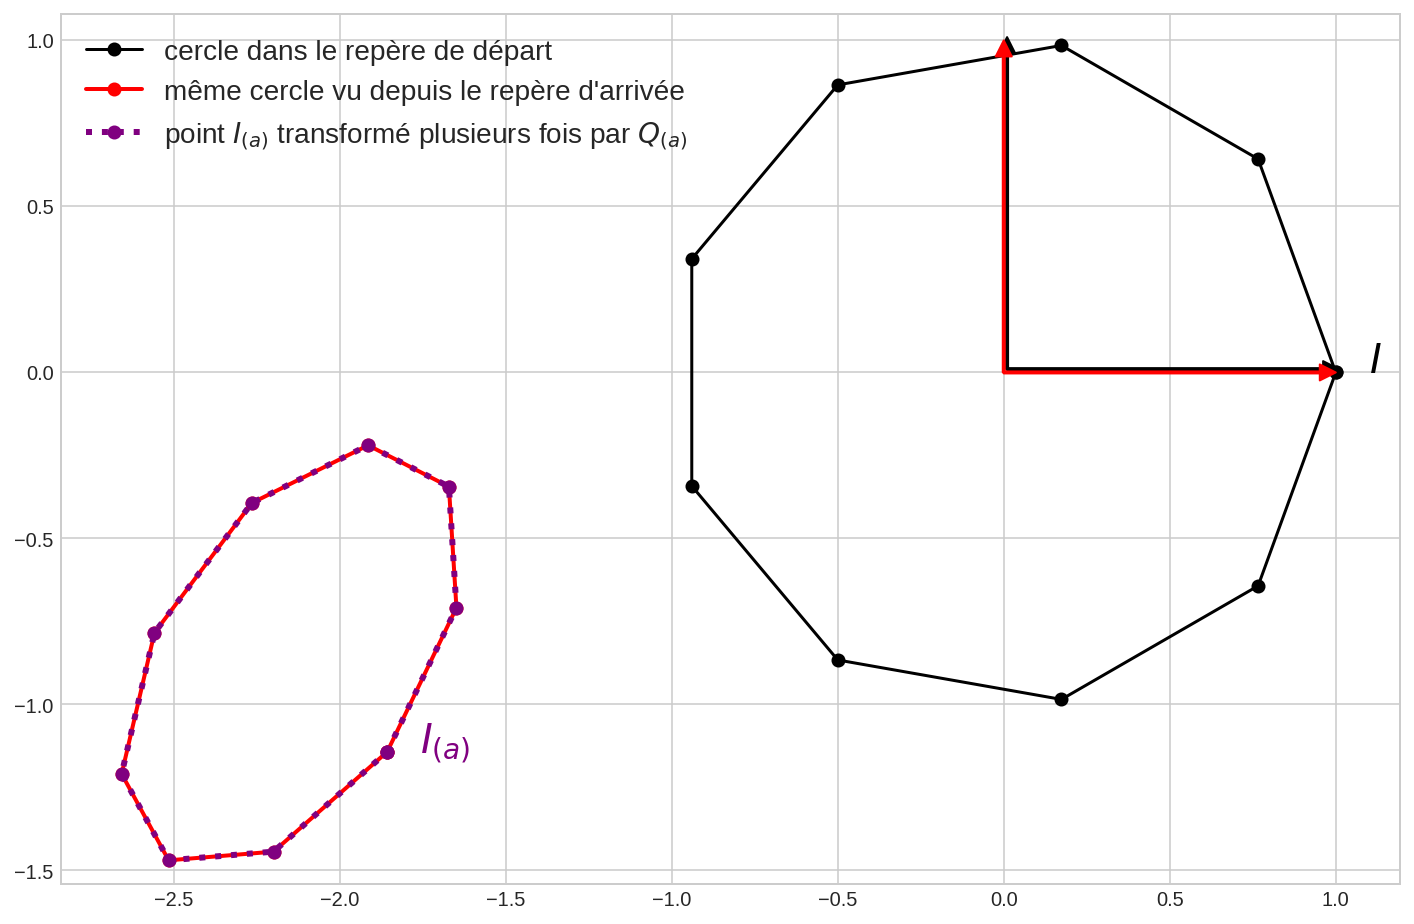

In [29]:
# plusieurs rotation qui donnent le cercle bleu :
cercle = np.array([Rot(α) @ I for α in np.linspace(0, 2*np.pi, 10)]).T

# le cercle exprimé dans le nouveau repère (noir)
p_cercle = lin.inv(P) @ to3D(cercle)

# construction de Q
Q = lambda θ: lin.inv(P) @ Rot3D(θ) @ P  # définition de Q en fonction de θ (c'est une fonction)
display(Q(2*np.pi/10))
# calcul de inv(P) @ I puis on applique Q pour faire tourner B autour de A (orange)
Ia = lin.inv(P) @ to3D(I)
p_rot_A = np.array([Q(α) @ Ia for α in np.linspace(0, 2*np.pi, 10)]).T 

# on affiche les repères
ε = 0.01
arrow2D(O+ε,I+ε, 'k')
arrow2D(O+ε,J+ε, 'k')
arrow2D(O,I, 'r')
arrow2D(O,J, 'r')
plt.annotate(r"$I$", I+δx , size=20, color='black')
plt.annotate(r"$I_{(a)}$", Ia[:2]+δx , size=20, color='purple')

# et voici nos rotations
plt.plot(cercle[0,:], cercle[1,:], 'o-k', 
         label="cercle dans le repère de départ") 
plt.plot(p_cercle[0,:], p_cercle[1,:], 'o-r', lw=2, 
         label="même cercle vu depuis le repère d'arrivée")
plt.plot(p_rot_A[0,:], p_rot_A[1,:], 'o:', lw=3, color='purple', 
         label=r"point $I_{(a)}$ transformé plusieurs fois par $Q_{(a)}$")
plt.legend(fontsize=14)
plt.axis("equal");